In [1]:
# This notebook ingests multiple csv-files of National Park Service hourly ozone data;
# calculates the maximum 8-hour mean for each day;
# takes the mean of this value for May through October of each year; and plots these values
# 
# Todd Mitchell, September 2019


In [1]:
# Preliminaries
import numpy as np
import matplotlib.pyplot as plt

# The following line is required to plot in a jupyter notebook
%matplotlib inline  

In [2]:
import sys
import tpm  # tpm is a module I wrote that consists functions to analyze geophysical data
dir( tpm ) # tells you what functions are in the module

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'anomalies',
 'arclength',
 'fill_year',
 'find_latlon',
 'plot_vertical_lines',
 'space_longitudes',
 'threetotwo',
 'write_ts',
 'yearsmonths',
 'yearsmonthsdays']

In [3]:
import pandas as pd

# Put in a link to the data files
sys.path.insert( 0, '/Users/mitchell/Documents/Data/misc_timeseries/ozone/castnet2/' )

# The data is in 6 csv-file, and there are a variety of header sizes ( the skiprow variable )
first = ( 1984, 1990, 1995, 2000, 2005, 2010, 2015 )
last =  ( 1989, 1994, 1999, 2004, 2009, 2014, 2018 )
skiprow = ( 12, 13, 12, 12, 12, 12, 12 )
# The following is the maximum number of station in a file
cname =  [ 'JOTR-BR', 'JOTR-LH', 'LAVO-ML', 'PINN-ES', 'SEKI-LK' ]

# Create a dataframe for the output mean May through October ozone amounts
a = np.arange( float(first[0]), float(last[-1])+1 ).astype( int )
a = np.expand_dims( a, axis=1 )
nt = a.shape[0]
nx = len( cname )
data = np.concatenate( ( a, np.ones( ( nt, nx ) )*np.nan ), axis=1 )
df2 = pd.DataFrame( data, columns = [ 'year' ] + cname )
df2
# from https://www.geeksforgeeks.org/different-ways-to-create-pandas-dataframe/

,year,JOTR-BR,JOTR-LH,LAVO-ML,PINN-ES,SEKI-LK
0,1984.0,NaN,NaN,NaN,NaN,NaN
1,1985.0,NaN,NaN,NaN,NaN,NaN
2,1986.0,NaN,NaN,NaN,NaN,NaN
3,1987.0,NaN,NaN,NaN,NaN,NaN
4,1988.0,NaN,NaN,NaN,NaN,NaN
5,1989.0,NaN,NaN,NaN,NaN,NaN
6,1990.0,NaN,NaN,NaN,NaN,NaN
7,1991.0,NaN,NaN,NaN,NaN,NaN
8,1992.0,NaN,NaN,NaN,NaN,NaN
9,1993.0,NaN,NaN,NaN,NaN,NaN


In [4]:
for icnt, yr1 in enumerate( first ):
    yr2 = last[icnt]
    print( icnt, yr1, yr2 )
    
    fn = "/Users/mitchell/Documents/Data/misc_timeseries/ozone/castnet2/ozone{0:4d}{1:4d}.csv".format( yr1, yr2 )
    df = pd.read_csv( fn, skiprows=skiprow[icnt], delimiter=',', na_values=-999.0 )
    if len( df.dtypes.index.tolist() )<28:
        "Error: The number of columns {0:d) is less than the expected 28".format( len( df.dtypes.index.tolist() ) )
        
    cname = df.loc[ :, 'ABBR' ].unique().tolist()
    cname    # ['JOTR-BR', 'JOTR-LH', 'LAVO-ML', 'PINN-ES', 'SEKI-LK']

    a = tpm.yearsmonthsdays( yr1, yr2 )
    
    for icnt2, name in enumerate( cname ):
        ts = df.loc[ df.loc[ :, 'ABBR' ]==cname[icnt2] ].reset_index()
        ts[ 'max 8hr-mean' ] = np.nanmax( ts.iloc[ :, 4:28 ].rolling( 8, axis=1, center=True, min_periods=1 ).mean(), axis=1 )
        ts = ts.drop( [ 'index' ], axis=1 )
        
        for year in np.arange( yr1, yr2+1 ):
            x = np.array( np.where( ( a[ 'years' ]==year ) & ( a['months']>=5 ) & ( a['months']<=10 ) ) )
            df2.loc[ year-first[0], cname[icnt2] ] = np.nanmean( ts.loc[ x[0,:], 'max 8hr-mean' ] )
            

0 1984 1989


/Users/mitchell/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: All-NaN axis encountered
/Users/mitchell/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: Mean of empty slice
/Users/mitchell/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:1017: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return getattr(section, self.name)[new_key]


1 1990 1994
2 1995 1999
3 2000 2004
4 2005 2009
5 2010 2014
6 2015 2018


In [5]:
df2

,year,JOTR-BR,JOTR-LH,LAVO-ML,PINN-ES,SEKI-LK
0,1984.0,NaN,NaN,NaN,NaN,58.750000
1,1985.0,NaN,NaN,NaN,NaN,53.522727
2,1986.0,NaN,NaN,NaN,74.750000,29.537481
3,1987.0,NaN,35.665450,35.536345,42.217838,44.380318
4,1988.0,NaN,46.921709,36.558196,43.832624,36.187782
5,1989.0,NaN,45.535185,39.755261,42.185291,41.789811
6,1990.0,NaN,63.491457,48.405726,54.564954,69.453203
7,1991.0,NaN,69.918268,47.593996,59.706509,67.294494
8,1992.0,NaN,71.403292,47.571351,54.604239,73.615845
9,1993.0,54.649817,67.966567,45.204233,56.225136,73.619022


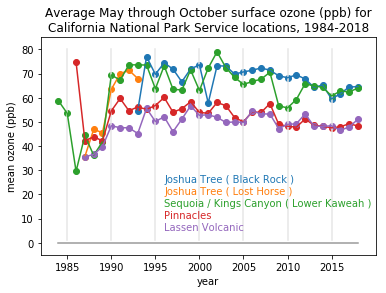

In [15]:
# I made this plot twice.  After the first time I decided to reorder the columns so that the 
# figure annotation is easier to read.
df2 = df2[ [ 'year', 'JOTR-BR', 'JOTR-LH', 'SEKI-LK', 'PINN-ES', 'LAVO-ML' ] ]

cname = df2.columns[ 1: ]
cname_long = ( 'Joshua Tree ( Black Rock )', 'Joshua Tree ( Lost Horse )', 
              'Sequoia / Kings Canyon ( Lower Kaweah )', 'Pinnacles', 'Lassen Volcanic' )      

( min( df2[ 'year'] ), max( df2[ 'year'] ) )

plt.clf()
tpm.plot_vertical_lines( ( 1985, 2015, 5 ), ( 1, 80 ) )
plt.plot( ( min( df2[ 'year'] ), max( df2[ 'year']) ), ( 0, 0 ), color=( 0.6, 0.6, 0.6,  ) )

for icnt, name in enumerate( cname ):
    ax = plt.plot( df2[ 'year'], df2[ name ], zorder=2 )
    plt.scatter(   df2[ 'year'], df2[ name ], zorder=2 )
    plt.text( 1996, 25-icnt*5, cname_long[icnt], color=ax[0].get_color())
    
plt.xlim( [ 1984-2, 2018+2 ] )
plt.ylim( [ -5, 85 ] )    
plt.ylabel( 'mean ozone (ppb)')
plt.xlabel( 'year')
plt.xticks( np.arange( 1985, 2018+1, step=5 ), 
    ( '1985', '1990', '1995', '2000', '2005', '2010', '2015') )
plt.title( r'Average May through October surface ozone (ppb) for' '\n' 
           r'California National Park Service locations, 1984-2018')

plt.savefig( '/Users/mitchell/anaconda3/ozonecamaythroughoctober.png')
plt.show()
